#  Strocke Prediction

### 1. Problem Definition
The goal is to develop a predictive model that accurately estimates stroke risk using a set of independent features.

### 2. Data

The Dataset if from a kaggle competition named *Stroke Prediction Dataset*.
- Link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer




## Data preprocessing


In [2]:
# Load the dataset
data = pd.read_csv(r'Dataset\healthcare-dataset-stroke-data.csv')

print("No of columns in the data : ", len(data.columns))
print("No of rows in the data : ", len(data))
print("\nFirst 5 Rows of the Data:")
data.head()

No of columns in the data :  12
No of rows in the data :  5110

First 5 Rows of the Data:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Data overview
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Basic statistics of numerical features
print("\nStatistical Summary:")
data.describe()  


Statistical Summary:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [6]:
numerical_columns = data.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [7]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [8]:
# Check for missing values
missing_data = data.isnull().sum()
print("\nMissing Data in Each Column:")
print(missing_data)


Missing Data in Each Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
# Mean imputation
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])


In [10]:
# Check if all missing values are handled
print("\nMissing Data After Imputation:")
print(data.isnull().sum())


Missing Data After Imputation:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [11]:
# Remove 'id' column as it's not useful for prediction
data.drop('id', axis=1, inplace=True)

In [12]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [13]:
# Print the unique values for each column ,excluding 'bmi' and 'age' 
columns_to_check = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level',
       'smoking_status', 'stroke'] 
# 'bmi' and 'age' are omitted 
unique_values = {col: data[col].unique() for col in columns_to_check}
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'gender': ['Male' 'Female' 'Other']
Unique values in column 'hypertension': [0 1]
Unique values in column 'heart_disease': [1 0]
Unique values in column 'ever_married': ['Yes' 'No']
Unique values in column 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values in column 'Residence_type': ['Urban' 'Rural']
Unique values in column 'avg_glucose_level': [228.69 202.21 105.92 ...  82.99 166.29  85.28]
Unique values in column 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values in column 'stroke': [1 0]


In [15]:
# Define the columns you want to check for negative values
columns_to_check = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke']  

for col in columns_to_check:
    negative_values = data[data[col] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column '{col}':")
        print(negative_values)
    else:
        print(f"No negative values in column '{col}'.")


No negative values in column 'age'.
No negative values in column 'hypertension'.
No negative values in column 'heart_disease'.
No negative values in column 'avg_glucose_level'.
No negative values in column 'bmi'.
No negative values in column 'stroke'.


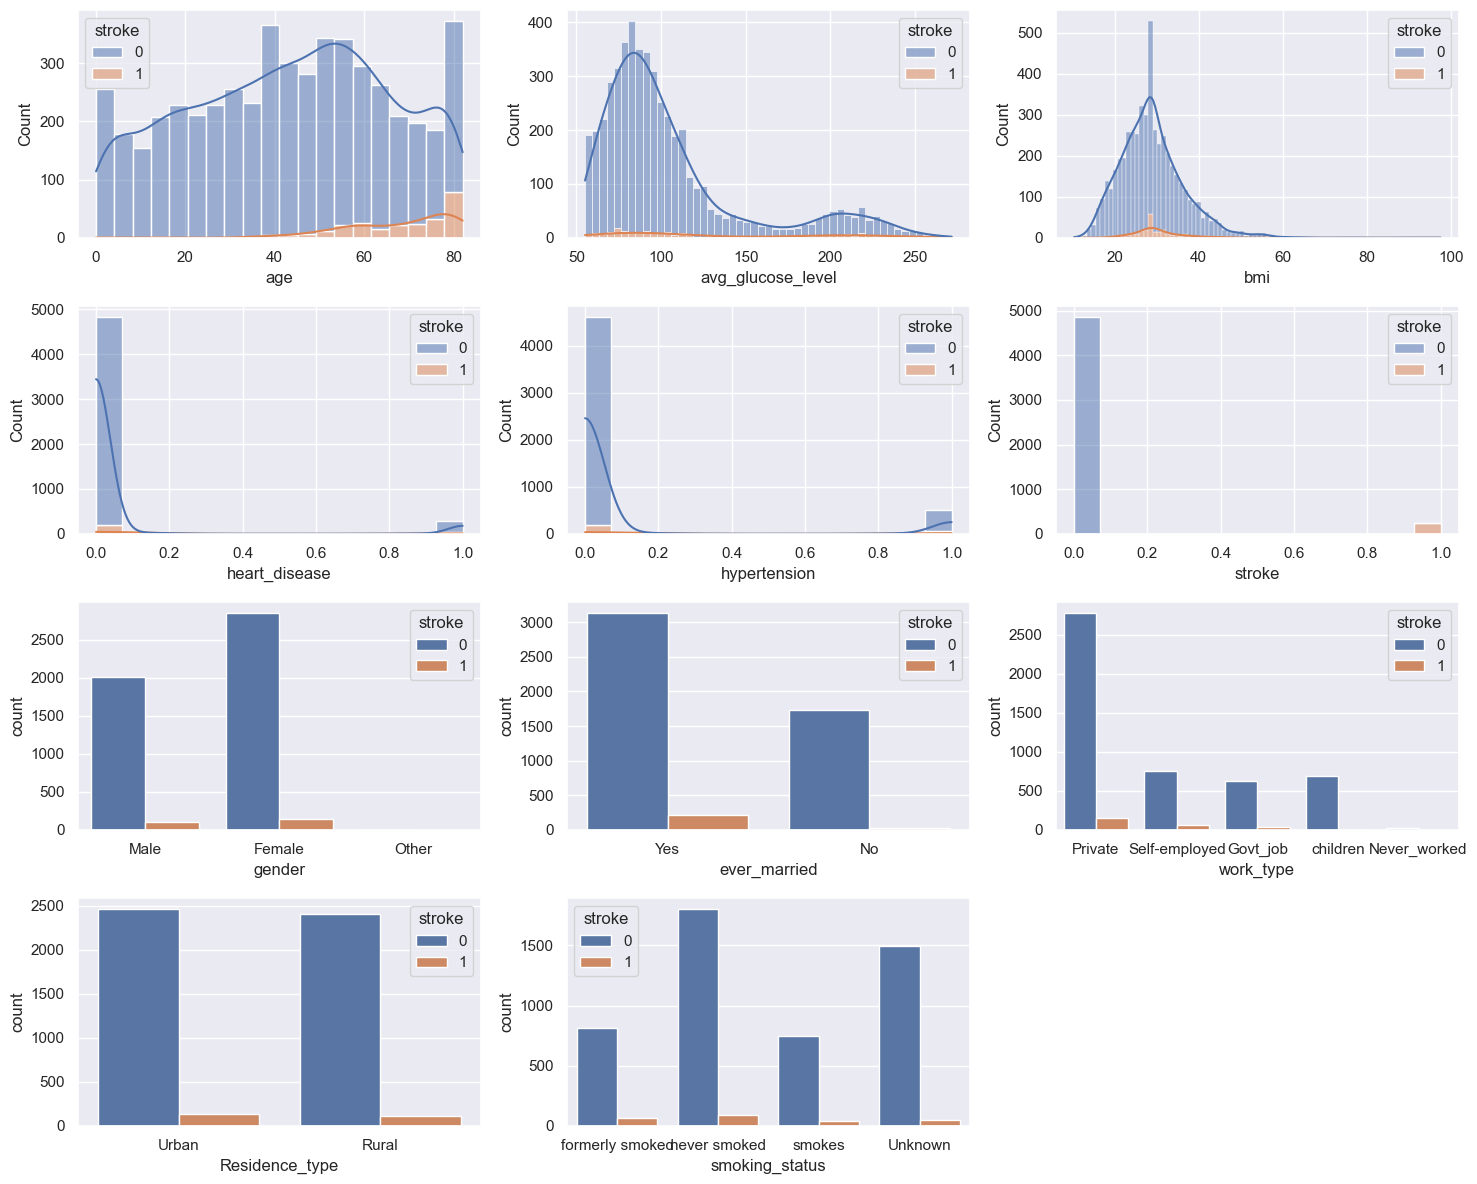

In [16]:
# Set figure size and random seed
sns.set(rc={"figure.figsize": (15, 12)})
np.random.seed(0)

# Create a 4x3 grid for 12 subplots
fig, axes = plt.subplots(4, 3)  # 4 rows, 3 columns

# Plotting histograms for numerical columns with stroke as hue
sns.histplot(data=data, x='age', hue='stroke', multiple="stack", ax=axes[0, 0], kde=True)                # Row 0, Column 0
sns.histplot(data=data, x='avg_glucose_level', hue='stroke', multiple="stack", ax=axes[0, 1], kde=True)  # Row 0, Column 1
sns.histplot(data=data, x='bmi', hue='stroke', multiple="stack", ax=axes[0, 2], kde=True)                # Row 0, Column 2
sns.histplot(data=data, x='heart_disease', hue='stroke', multiple="stack", ax=axes[1, 0], kde=True)      # Row 1, Column 0
sns.histplot(data=data, x='hypertension', hue='stroke', multiple="stack", ax=axes[1, 1], kde=True)       # Row 1, Column 1
sns.histplot(data=data, x='stroke', hue='stroke', multiple="stack", ax=axes[1, 2], kde=True)             # Row 1, Column 2

# Plotting count plots for categorical columns with stroke as hue
sns.countplot(data=data, x='gender', hue='stroke', ax=axes[2, 0])               # Row 2, Column 0
sns.countplot(data=data, x='ever_married', hue='stroke', ax=axes[2, 1])         # Row 2, Column 1
sns.countplot(data=data, x='work_type', hue='stroke', ax=axes[2, 2])            # Row 2, Column 2
sns.countplot(data=data, x='Residence_type', hue='stroke', ax=axes[3, 0])       # Row 3, Column 0
sns.countplot(data=data, x='smoking_status', hue='stroke', ax=axes[3, 1])       # Row 3, Column 1

# Hide the empty subplot in the last row, last column (Row 3, Column 2)
axes[3, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## Variable separation

In [17]:
# Label encoding for categorical features
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

print("\nTransformed Categorical Columns:")
data.head()



Transformed Categorical Columns:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [18]:
# Check for duplicates and remove them
print("\nNumber of Duplicate Rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)




Number of Duplicate Rows: 0


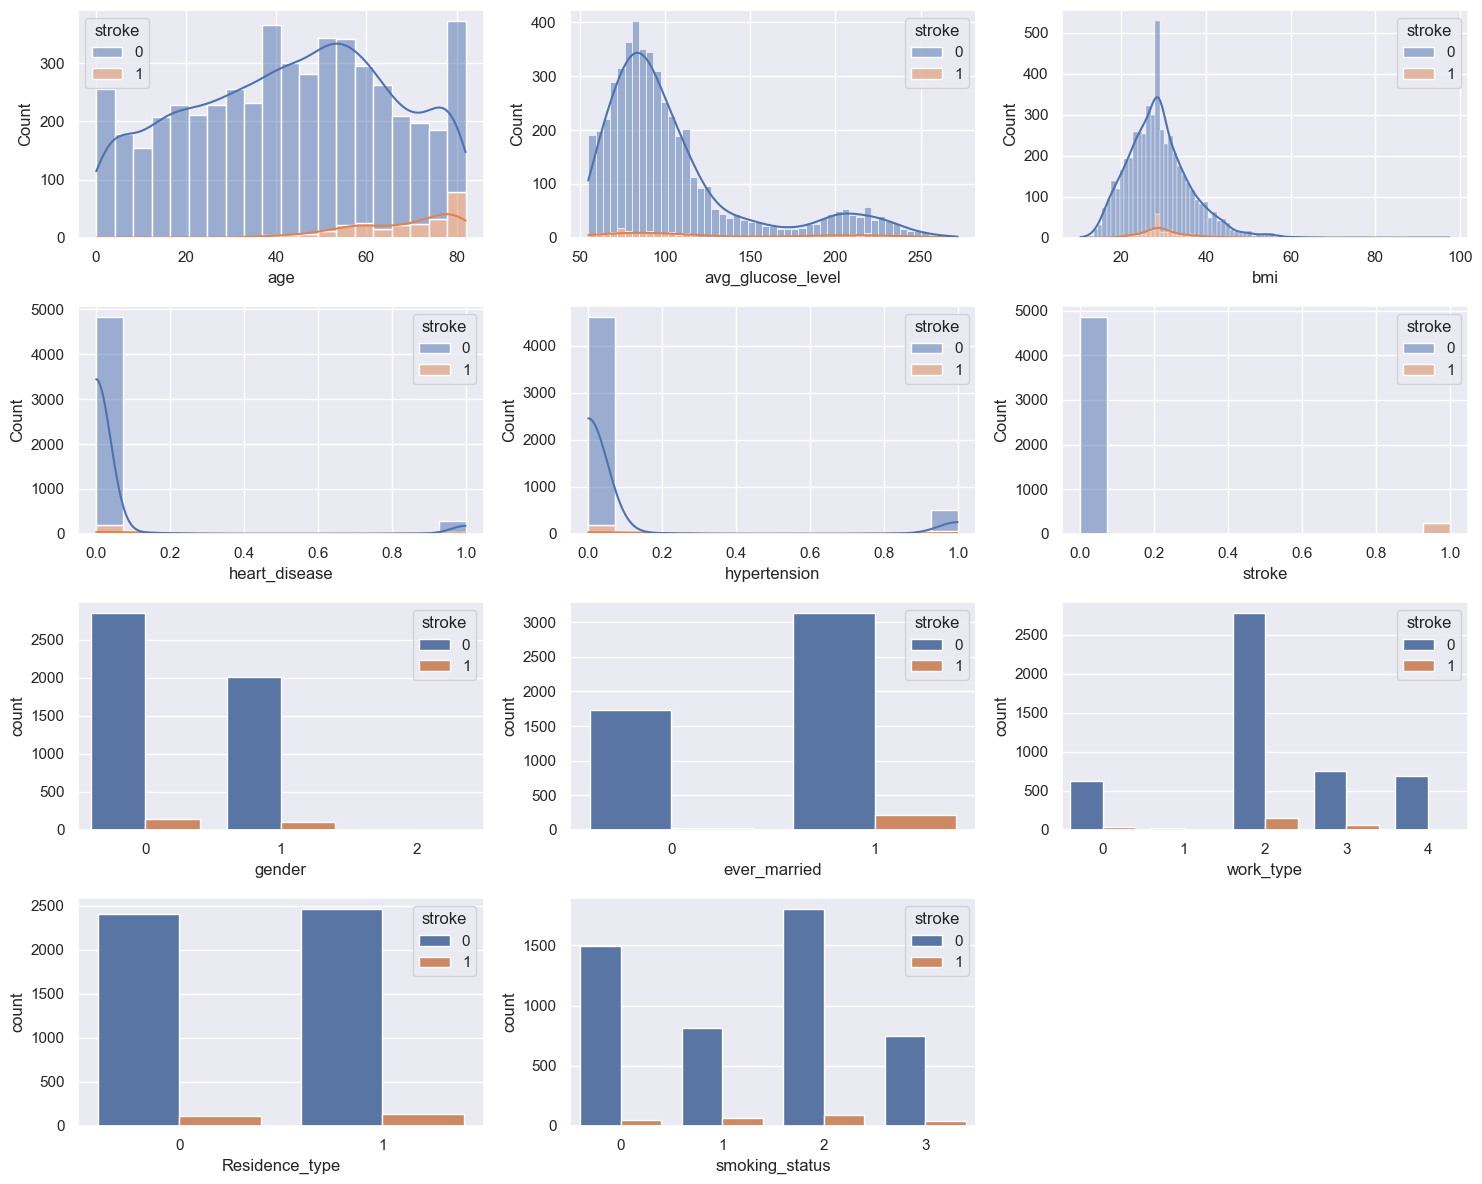

In [19]:
# Set figure size and random seed
sns.set(rc={"figure.figsize": (15, 12)})
np.random.seed(0)

# Create a 4x3 grid for 12 subplots
fig, axes = plt.subplots(4, 3)  # 4 rows, 3 columns

# Plotting histograms for numerical columns with stroke as hue
sns.histplot(data=data, x='age', hue='stroke', multiple="stack", ax=axes[0, 0], kde=True)                # Row 0, Column 0
sns.histplot(data=data, x='avg_glucose_level', hue='stroke', multiple="stack", ax=axes[0, 1], kde=True)  # Row 0, Column 1
sns.histplot(data=data, x='bmi', hue='stroke', multiple="stack", ax=axes[0, 2], kde=True)                # Row 0, Column 2
sns.histplot(data=data, x='heart_disease', hue='stroke', multiple="stack", ax=axes[1, 0], kde=True)      # Row 1, Column 0
sns.histplot(data=data, x='hypertension', hue='stroke', multiple="stack", ax=axes[1, 1], kde=True)       # Row 1, Column 1
sns.histplot(data=data, x='stroke', hue='stroke', multiple="stack", ax=axes[1, 2], kde=True)             # Row 1, Column 2

# Plotting count plots for categorical columns with stroke as hue
sns.countplot(data=data, x='gender', hue='stroke', ax=axes[2, 0])               # Row 2, Column 0
sns.countplot(data=data, x='ever_married', hue='stroke', ax=axes[2, 1])         # Row 2, Column 1
sns.countplot(data=data, x='work_type', hue='stroke', ax=axes[2, 2])            # Row 2, Column 2
sns.countplot(data=data, x='Residence_type', hue='stroke', ax=axes[3, 0])       # Row 3, Column 0
sns.countplot(data=data, x='smoking_status', hue='stroke', ax=axes[3, 1])       # Row 3, Column 1

# Hide the empty subplot in the last row, last column (Row 3, Column 2)
axes[3, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### Exploratory Data Analysis

In [20]:
#descripe statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.414286,0.493044,0.00,0.000,0.000,1.00,2.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
work_type,5110.0,2.167710,1.090293,0.00,2.000,2.000,3.00,4.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
smoking_status,5110.0,1.376908,1.071534,0.00,0.000,2.000,2.00,3.00


In [21]:
data.select_dtypes(include="number").columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

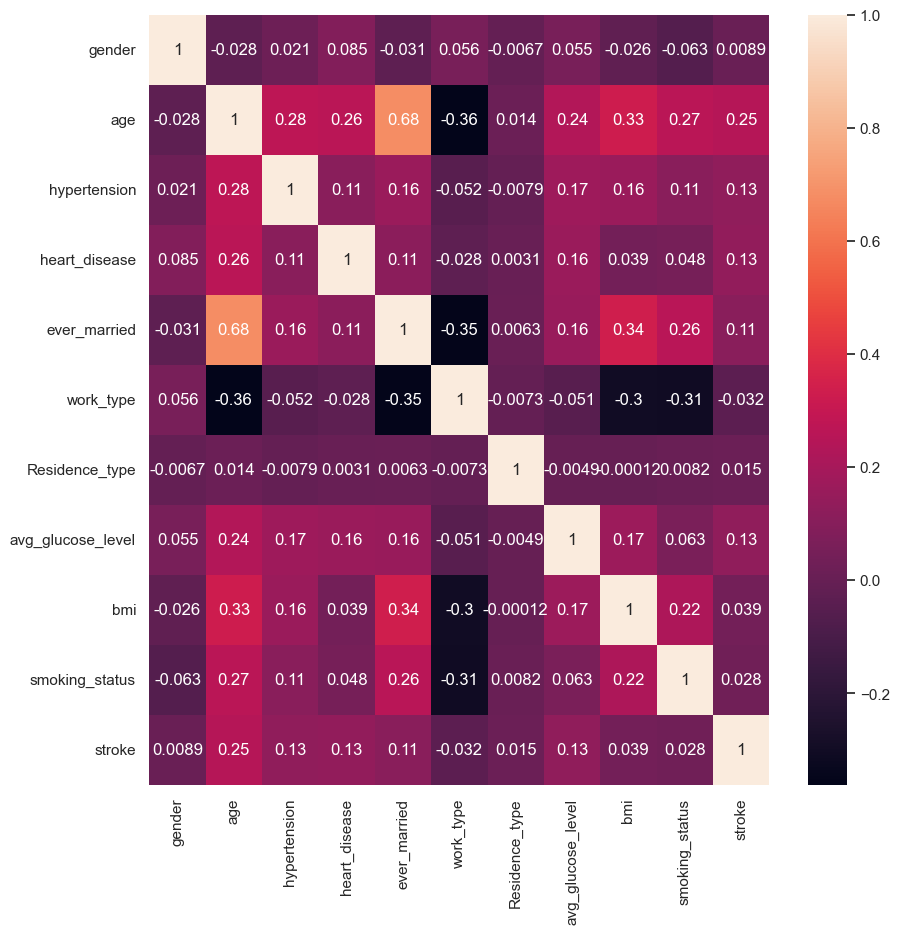

In [22]:
# Correlation heatmap
correlation_matrix = data.select_dtypes(include="number").corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Feature Scaling and Train-Test Split

In [23]:

# Separate features and target variable
X = data.drop(columns=['stroke'])  # Features (independent variables)
y = data['stroke']  # Target (dependent variable)

In [24]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [25]:
# Step 5: Splitting the Dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Test Data Sizes:")
print(f"Training Data: {X_train.shape}, Test Data: {X_test.shape}")


Training and Test Data Sizes:
Training Data: (4088, 10), Test Data: (1022, 10)


### Model Training and Evaluation

##### Logistic Regression

Logistic Regression Train Accuracy: 95.43%
Logistic Regression Test Accuracy: 93.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[960   0]
 [ 62   0]]


c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

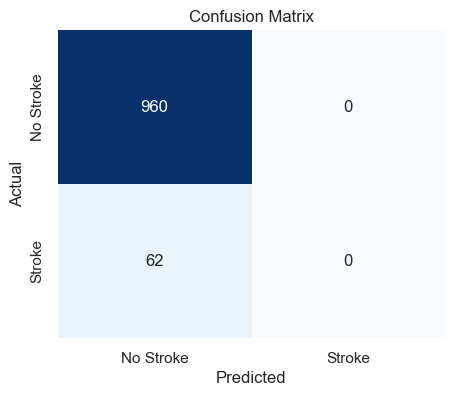

In [26]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

# Evaluate Logistic Regression
Test_Accuracy = accuracy_score(y_test, y_pred_test)
Train_Accuracy = accuracy_score(y_train, y_pred_train)

print(f"Logistic Regression Train Accuracy: {Train_Accuracy * 100:.2f}%")
print(f"Logistic Regression Test Accuracy: {Test_Accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))  # Increased size for better visibility
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




##### Random Forest Classifier

Random Forest Classifier Train Accuracy: 100.00%
Random Forest Classifier Test Accuracy: 93.84%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[959   1]
 [ 62   0]]


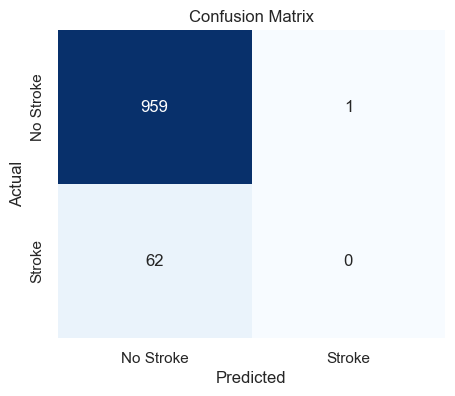

In [27]:

# Train Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate Random Forest Classifier
Test_Accuracy = accuracy_score(y_test, y_pred_test)
Train_Accuracy = accuracy_score(y_train, y_pred_train)

print(f"Random Forest Classifier Train Accuracy: {Train_Accuracy * 100:.2f}%")
print(f"Random Forest Classifier Test Accuracy: {Test_Accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))  # Increased size for better visibility
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##### Decision Tree Classifier

DecisionTreeClassifier Train Accuracy: 100.00%
DecisionTreeClassifier Test Accuracy: 91.29%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.21      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022


Confusion Matrix:
[[923  37]
 [ 52  10]]


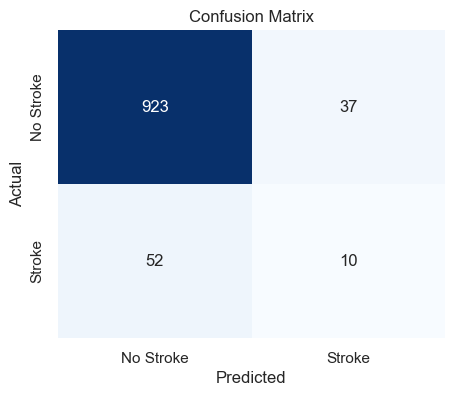

In [28]:

rf_model = DecisionTreeClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate Random Forest Classifier
Test_Accuracy = accuracy_score(y_test, y_pred_test)
Train_Accuracy = accuracy_score(y_train, y_pred_train)

print(f"DecisionTreeClassifier Train Accuracy: {Train_Accuracy * 100:.2f}%")
print(f"DecisionTreeClassifier Test Accuracy: {Test_Accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))  # Increased size for better visibility
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##### Support Vector Classification (SVC)

Support Vector Classification Train Accuracy: 95.43%
Support Vector Classification Test Accuracy: 93.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[960   0]
 [ 62   0]]


c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

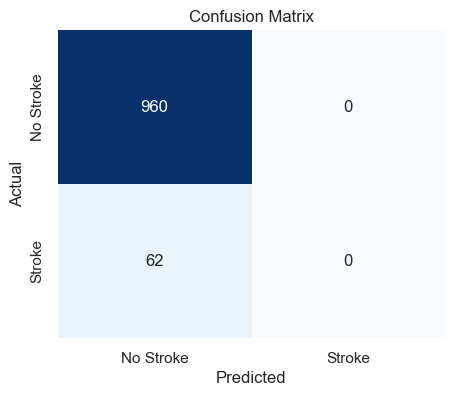

In [29]:
rf_model = SVC()
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

Test_Accuracy = accuracy_score(y_test, y_pred_test)
Train_Accuracy = accuracy_score(y_train, y_pred_train)
print(f"Support Vector Classification Train Accuracy: {Train_Accuracy * 100:.2f}%")
print(f"Support Vector Classification Test Accuracy: {Test_Accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))  # Increased size for better visibility
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### SMOTE (Synthetic Minority Over-sampling Technique)

##### SMOTE generates synthetic samples for minority classes in imbalanced datasets to enhance model performance.


Training and Test Data Sizes After SMOTE:
Training Data: (7777, 10), Test Data: (1945, 10)
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy during GridSearchCV: 0.9105050463303549
Cross-validation scores for each fold: [0.9125964  0.91066838 0.91061093 0.89967846 0.91897106]
Mean cross-validation score: 0.9105050463303549
Random Forest Training Accuracy: 96.86%
Random Forest Test Accuracy after tuning: 91.83%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       975
           1       0.89      0.96      0.92       970

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945


Confusion Matrix (Test Set):
[[855 120]
 [ 39 931]]


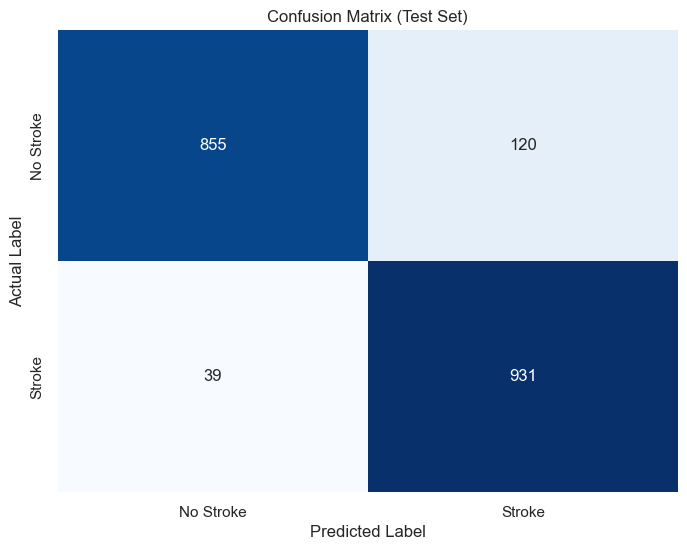

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()

X_smote[numerical_columns] = scaler.fit_transform(X_smote[numerical_columns])

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)

X_train_smote[numerical_columns] = scaler.fit_transform(X_train_smote[numerical_columns])
X_test_smote[numerical_columns] = scaler.transform(X_test_smote[numerical_columns])

print("\nTraining and Test Data Sizes After SMOTE:")
print(f"Training Data: {X_train_smote.shape}, Test Data: {X_test_smote.shape}")

rf = RandomForestClassifier(random_state=42, oob_score=True)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4, 6]
}

grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_smote, y_train_smote)

print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best Accuracy during GridSearchCV:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_

cv_scores = cross_val_score(best_rf, X_train_smote, y_train_smote, cv=5)
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

y_train_pred_rf = best_rf.predict(X_train_smote)
accuracy_train_rf = accuracy_score(y_train_smote, y_train_pred_rf)
print(f"Random Forest Training Accuracy: {accuracy_train_rf * 100:.2f}%")

y_pred_rf = best_rf.predict(X_test_smote)
accuracy_rf = accuracy_score(y_test_smote, y_pred_rf)
print(f"Random Forest Test Accuracy after tuning: {accuracy_rf * 100:.2f}%")

print("\nClassification Report (Test Set):")
print(classification_report(y_test_smote, y_pred_rf))

cm = confusion_matrix(y_test_smote, y_pred_rf)
print("\nConfusion Matrix (Test Set):")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix (Test Set)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

pickle.dump(best_rf, open('./rf_model.pkl', 'wb'))
pickle.dump(scaler, open('./scaler.pkl', 'wb'))



Training and Test Data Sizes After SMOTE:
Training Data: (7777, 10), Test Data: (1945, 10)
Cross-Validation Accuracy: 78.72% ± 0.85%


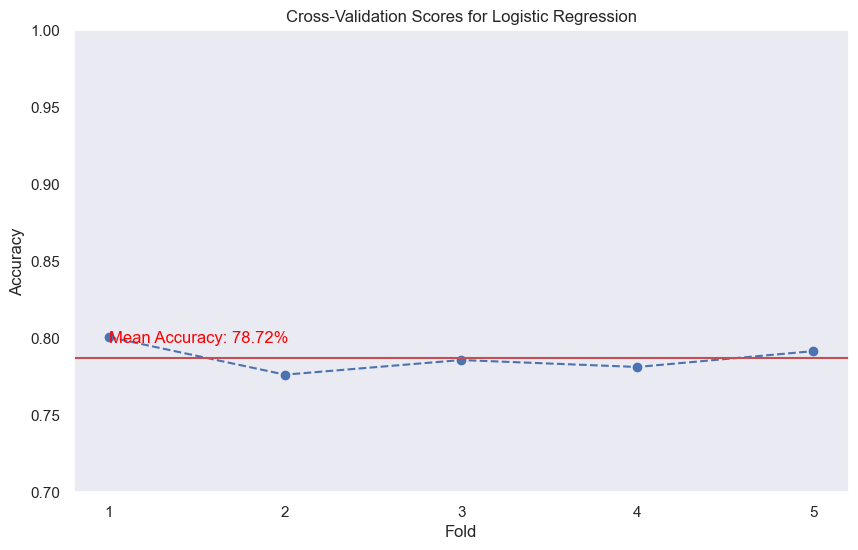

Logistic Regression Training Accuracy: 78.77%
Logistic Regression Test Accuracy after tuning: 78.46%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       975
           1       0.76      0.82      0.79       970

    accuracy                           0.78      1945
   macro avg       0.79      0.78      0.78      1945
weighted avg       0.79      0.78      0.78      1945


Confusion Matrix:
[[729 246]
 [173 797]]


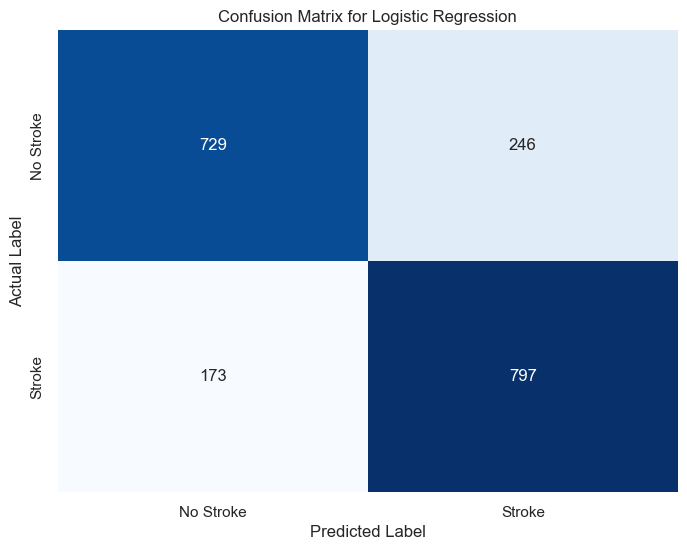

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

numerical_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
X_smote[numerical_columns] = scaler.fit_transform(X_smote[numerical_columns])

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

print("\nTraining and Test Data Sizes After SMOTE:")
print(f"Training Data: {X_train_smote.shape}, Test Data: {X_test_smote.shape}")

log_reg = LogisticRegression(random_state=42, max_iter=2000)
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9]
    }
]

grid_search_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_smote, y_train_smote)

best_lr = grid_search_lr.best_estimator_

cv_scores = cross_val_score(best_lr, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='--', color='b')
plt.title("Cross-Validation Scores for Logistic Regression")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(1, len(cv_scores) + 1))
plt.ylim(0.7, 1)
plt.grid()
plt.axhline(y=cv_scores.mean(), color='r', linestyle='-')
plt.text(1, cv_scores.mean() + 0.01, f'Mean Accuracy: {cv_scores.mean() * 100:.2f}%', color='red')
plt.show()

y_train_pred_lr = best_lr.predict(X_train_smote)
accuracy_train_lr = accuracy_score(y_train_smote, y_train_pred_lr)
print(f"Logistic Regression Training Accuracy: {accuracy_train_lr * 100:.2f}%")

y_pred_lr = best_lr.predict(X_test_smote)
accuracy_lr = accuracy_score(y_test_smote, y_pred_lr)
print(f"Logistic Regression Test Accuracy after tuning: {accuracy_lr * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_lr))

cm_lr = confusion_matrix(y_test_smote, y_pred_lr)
print("\nConfusion Matrix:")
print(cm_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

pickle.dump(best_lr, open('./logistic_regression_model.pkl', 'wb'))
pickle.dump(scaler, open('./scaler.pkl', 'wb'))
